# 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import dataframes

In [2]:
# Defining the path
path = r'C:\Users\Admin\2nd-OCT-2023 Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\Admin\\2nd-OCT-2023 Instacart Basket Analysis'

In [4]:
# Importing dataframe orders_products_customer_merge.pkl
df_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customer_merge_.pkl'))

In [5]:
# Check columns
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_orde,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
df_merged.shape

(32434212, 33)

In [7]:
# Removing the limit to the amount of columns displayed by default
pd.set_option('display.max_columns', None)

In [8]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_orde,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### Q2. Consider any security implications that might exist for this new data.

PII data like names, email addresses and home addresses are sensitive and should be dropped. Customer names were provided and as such will be dropped.

In [9]:
# Dropping the customer names (first_name and surname) columns
df_merged = df_merged.drop(['first_name', 'surname'], axis=1)

In [10]:
# Check columns to make sure PII data has been dropped
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_orde,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


### Q3. Create a regional segmentation of the data.

In [11]:
# Assigning states to their corresponding regions
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [12]:
df_merged.loc[df_merged['state'].isin(Northeast), 'region'] = 'Northeast'

In [13]:
df_merged.loc[df_merged['state'].isin(Midwest), 'region'] = 'Midwest'

In [14]:
df_merged.loc[df_merged['state'].isin(South), 'region'] = 'South'

In [15]:
df_merged.loc[df_merged['state'].isin(West), 'region'] = 'West'

In [16]:
# Check to see if the "region" column was successfully created and populated 
df_merged['region'].value_counts(dropna = False)

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

In [17]:
# Check dataframe for the region column
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_orde,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


##### Determine whether there’s a difference in spending habits between the different U.S. regions.

In [18]:
# Create crosstab between spending and region
crosstab = pd.crosstab(df_merged['spending_flag'], df_merged['region'], dropna = False)

In [19]:
# Check crosstab
crosstab

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,156129,108343,210182,160807
Low spender,7447681,5620004,10591428,8139638


The spending habits of all regions are similar in terms of percentages as a very small percentage of the population in each region are high spenders with low spenders making up the majority. The southern region leads the way in total number of spenders with more than 10.2 million spenders in total.

In [20]:
# Copy crosstab to clipboard
crosstab.to_clipboard()

### Q4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [21]:
# Create exclusion variables
df_merged.loc[df_merged['max_order'] < 5, 'activity_flag'] = 'low activity'

In [22]:
df_merged.loc[df_merged['max_order'] >= 5, 'activity_flag'] = 'active customer'

In [23]:
# Check variables
df_merged['activity_flag'].value_counts(dropna = False)

activity_flag
active customer    30992664
low activity        1441548
Name: count, dtype: int64

In [24]:
# Create a subset for low activity customers
low_activity_customers = df_merged[df_merged['activity_flag'] =='low activity']

In [25]:
active_customers = df_merged[df_merged['activity_flag'] =='active customer']

In [26]:
# Check whether the low_activity_customers subset numbers match
low_activity_customers.shape

(1441548, 33)

In [27]:
# Check whether the active_customers subset numbers match
active_customers.shape

(30992664, 33)

In [28]:
# Export the low_activity_customers sample as a pickle file. 
low_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

In [29]:
# Export the active_customers sample as a pickle file. 
active_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_cutomers.pkl'))

### Q5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

As low activity customers ( customers with less than 5 orders) have been excluded from the data, I will be using the newly created dataset for customers with more than 5 orders (active_customers)

#### Creating age groups

In [30]:
active_customers['age'].describe()

count    3.099266e+07
mean     4.946793e+01
std      1.848520e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

Ages range between 18 (min) and 81 (max)
Therefore, age groups were created as follows: 18 - 29, 30 - 49, 50 - 59, 60 - 81

In [31]:
active_customers.loc[(active_customers['age'] >= 18) & (active_customers['age'] <= 29), 'age_group'] = '18-29 years old'

C:\Users\Admin\AppData\Local\Temp\ipykernel_22384\3953118987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers.loc[(active_customers['age'] >= 18) & (active_customers['age'] <= 29), 'age_group'] = '18-29 years old'


In [32]:
active_customers.loc[(active_customers['age'] >= 30) & (active_customers['age'] <= 49), 'age_group'] = '30-49 years old'


In [33]:
active_customers.loc[(active_customers['age'] >= 50) & (active_customers['age'] <= 59), 'age_group'] = '50-59 years old'


In [34]:
active_customers.loc[(active_customers['age'] >= 60) & (active_customers['age'] <= 81), 'age_group'] = '60-81 years old'

In [35]:
# Check
active_customers['age_group'].value_counts(dropna = False)

age_group
60-81 years old    10583941
30-49 years old     9739204
18-29 years old     5823021
50-59 years old     4846498
Name: count, dtype: int64

#### Creating income groups

In [36]:
active_customers['income'].describe()

count    3.099266e+07
mean     9.967322e+04
std      4.313928e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

From the statistics above, we can split income into 3 (High, Middle, Low) based on the percentile values i.e 25% for low, 50% for middle and 75% for high.

Therefore low income is income <= 67289
          middle income is income > 67289 but < 128101
          high income is income > 128101

In [37]:
active_customers.loc[active_customers['income'] <= 67292, 'income_group'] = 'Low Income'

C:\Users\Admin\AppData\Local\Temp\ipykernel_22384\3783984558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_customers.loc[active_customers['income'] <= 67292, 'income_group'] = 'Low Income'


In [38]:
active_customers.loc[(active_customers['income'] > 67292) & (active_customers['income'] < 128101), 'income_group'] = 'Middle Income'


In [39]:
active_customers.loc[active_customers['income'] > 128101, 'income_group'] = 'High Income'

In [40]:
active_customers['income_group'].value_counts(dropna=False)

income_group
Middle Income    15495543
Low Income        7748855
High Income       7748000
NaN                   266
Name: count, dtype: int64

In [41]:
# Check columns
active_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_orde,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag,age_group,income_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income


#### Creating labels based on department_id

In [42]:
# Importing departments_wrangled data set
dept_wrangled = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [43]:
# Check columns in data set
dept_wrangled

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [44]:
# Renaming 'Unnamed: 0' to 'department_id'
dept_wrangled.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [45]:
# Check renamed column
dept_wrangled

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [46]:
df_final = active_customers

In [47]:
# Merging the final data set with all the changes made with the departments file
df_final = df_final.merge(dept_wrangled, on = 'department_id')

In [48]:
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_orde,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag,age_group,income_group,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income,beverages


#### Creating a dependants group

In [49]:
df_final.loc[df_final['number_of_dependants'] == 0, 'dependants_group'] = 'No dependants'

In [50]:
df_final.loc[df_final['number_of_dependants'] > 0, 'dependants_group'] = 'Has dependants'

In [51]:
# Check number of dependants in the dataframe
df_final['number_of_dependants'].value_counts()

number_of_dependants
3    7779452
0    7747032
2    7740199
1    7725981
Name: count, dtype: int64

In [52]:
# Check the number of dependants in dependants_group to see if they match with the total number of dependants in the dataframe
df_final['dependants_group'].value_counts()

dependants_group
Has dependants    23245632
No dependants      7747032
Name: count, dtype: int64

In [53]:
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_orde,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag,age_group,income_group,department,dependants_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income,beverages,Has dependants
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income,beverages,Has dependants
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income,beverages,Has dependants
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income,beverages,Has dependants
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income,beverages,Has dependants


#### Group by family profile

In [54]:
df_final['marital_status'].value_counts(dropna = False)

marital_status
married                             21763021
single                               5099271
divorced/widowed                     2647761
living with parents and siblings     1482611
Name: count, dtype: int64

In [55]:
df_final['gender'].value_counts(dropna = False)

gender
Male      15600678
Female    15391986
Name: count, dtype: int64

##### Married with no children

In [56]:
df_final.loc[(df_final['marital_status'] == 'married') & (df_final['dependants_group'] == 'No dependants') & (df_final['gender'] == 'Female'), 'family_profile'] = 'married female, no children'

In [57]:
df_final.loc[(df_final['marital_status'] == 'married') & (df_final['dependants_group'] == 'No dependants') & (df_final['gender'] == 'Male'), 'family_profile'] = 'married male, no children'

#### Married with children

In [58]:
df_final.loc[(df_final['marital_status'] == 'married') & (df_final['dependants_group'] == 'Has dependants') & (df_final['gender'] == 'Female'), 'family_profile'] = 'married female with children'

In [59]:
df_final.loc[(df_final['marital_status'] == 'married') & (df_final['dependants_group'] == 'Has dependants') & (df_final['gender'] == 'Male'), 'family_profile'] = 'married male with children'

#### Single with no children

In [60]:
df_final.loc[(df_final['marital_status'].isin(['single','living with parents and siblings','divorced/widowed'])) & (df_final['dependants_group'] == 'No dependants') & (df_final['gender'] == 'Female'), 'family_profile'] = 'single female, no children'

In [61]:
df_final.loc[(df_final['marital_status'].isin(['single','living with parents and siblings','divorced/widowed'])) & (df_final['dependants_group'] == 'No dependants') & (df_final['gender'] == 'Male'), 'family_profile'] = 'single male, no children'

#### Single with children

In [62]:
df_final.loc[(df_final['marital_status'].isin(['single','living with parents and siblings','divorced/widowed'])) & (df_final['dependants_group'] == 'Has dependants') & (df_final['gender'] == 'Female'), 'family_profile'] = 'single female with children'

In [63]:
df_final.loc[(df_final['marital_status'].isin(['single','living with parents and siblings','divorced/widowed'])) & (df_final['dependants_group'] == 'Has dependants') & (df_final['gender'] == 'Male'), 'family_profile'] = 'single male with children'

In [64]:
df_final['family_profile'].value_counts(dropna = False)

family_profile
married male with children      10957429
married female with children    10805592
single male, no children         3884900
single female, no children       3862132
single male with children         758349
single female with children       724262
Name: count, dtype: int64

There are no married males or females without children.

In [65]:
# Check columns
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_orde,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag,age_group,income_group,department,dependants_group,family_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income,beverages,Has dependants,married female with children
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income,beverages,Has dependants,married female with children
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income,beverages,Has dependants,married female with children
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income,beverages,Has dependants,married female with children
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,30-49 years old,Low Income,beverages,Has dependants,married female with children


# Q6. Create an appropriate visualization to show the distribution of profiles.

##### Family profiles distribution

In [66]:
# Check dataframe columns
df_final.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_orde', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'region',
       'activity_flag', 'age_group', 'income_group', 'department',
       'dependants_group', 'family_profile'],
      dtype='object')

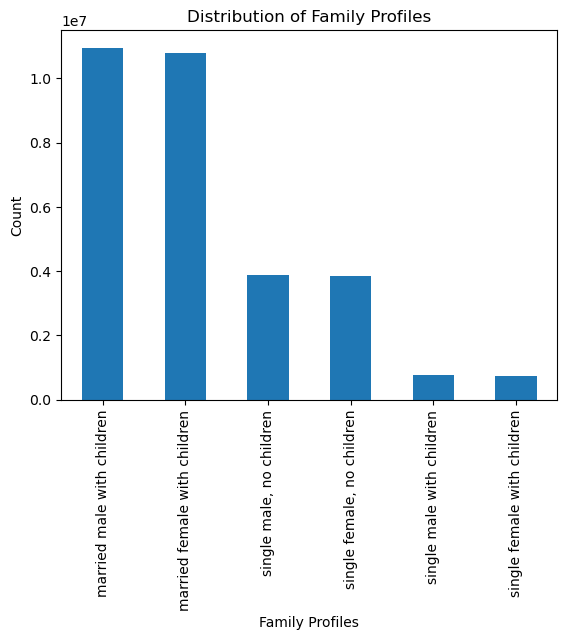

In [67]:
# Create family_profile_bar chart
family_profile_bar_chart = df_final['family_profile'].value_counts().plot.bar()

# Titles and labels
plt.title('Distribution of Family Profiles')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.show()

In [68]:
# Export bar chart to visualizations folder
family_profile_bar_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_bar_chart.png'))

# Q7. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [69]:
# Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
family_profile_agg = df_final.groupby('family_profile').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [70]:
family_profile_agg

order_id prices                    
                                 count    min       mean      max
family_profile                                                   
married female with children  10805592    1.0  11.875454  99999.0
married male with children    10957429    1.0  12.014216  99999.0
single female with children     724262    1.0  12.215317  99999.0
single female, no children     3862132    1.0  11.665994  99999.0
single male with children       758349    1.0   9.628912  99999.0
single male, no children       3884900    1.0  12.538412  99999.0

# Q8. Compare your customer profiles with regions and departments.

#### Distribution of family profile by Region

In [71]:
# Create crosstab of family_profile and region
fam_region_profile = pd.crosstab(df_final['family_profile'],df_final['region'], dropna = False)

In [72]:
# Check
fam_region_profile

region,Midwest,Northeast,South,West
family_profile,,,,
married female with children,2562144,1858909,3572193,2812346
married male with children,2529384,1998548,3658012,2771485
single female with children,171999,118858,254326,179079
"single female, no children",906419,664320,1315552,975841
single male with children,179693,137925,251579,189152
"single male, no children",918068,691508,1268800,1006524


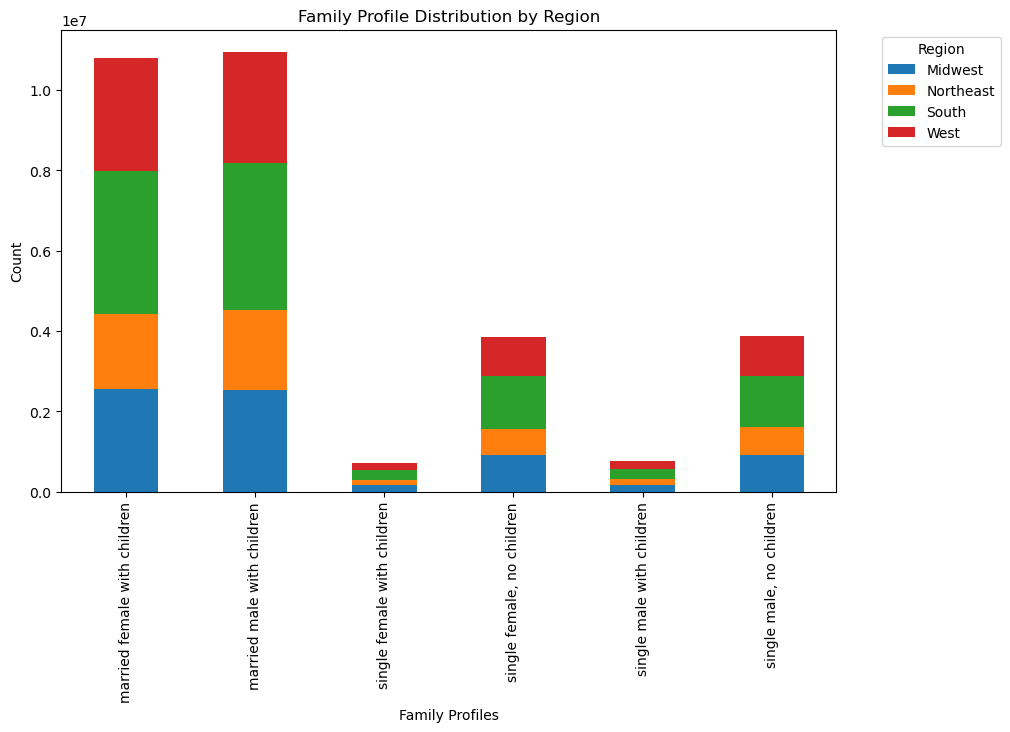

In [73]:
# Create fam_region_profile_stacked_bar chart
fam_region_profile_stacked_bar_chart = fam_region_profile.plot.bar(stacked = True, figsize = (10, 6))

# Titles and labels
plt.title('Family Profile Distribution by Region')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.legend(title = 'Region', bbox_to_anchor = (1.05, 1), loc = 'upper left')

In [74]:
# Export stacked bar chart to visualizations folder
fam_region_profile_stacked_bar_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_region_profile_stacked_bar_chart.png'))

#### Distribution of family profiles by department

In [75]:
# Create crosstab of department and family_profile
fam_departments_profile = pd.crosstab(df_final['department'],df_final['family_profile'], dropna = False)

In [76]:
# Check
fam_departments_profile

family_profile,married female with children,married male with children,single female with children,"single female, no children",single male with children,"single male, no children"
department,,,,,,
alcohol,52473,46969,3785,18621,4595,18231
babies,140919,146764,9253,50469,10128,52859
bakery,395010,393620,26507,139885,27403,142601
beverages,899686,907791,58292,322425,60816,322924
breakfast,237793,238483,16475,83893,17019,84432
bulk,11884,11934,777,4081,856,3919
canned goods,351369,361208,22967,124165,25510,126855
dairy eggs,1808605,1833980,123320,649869,127708,648346
deli,349284,353049,23776,126183,24343,127199


<Figure size 1000x1200 with 0 Axes>

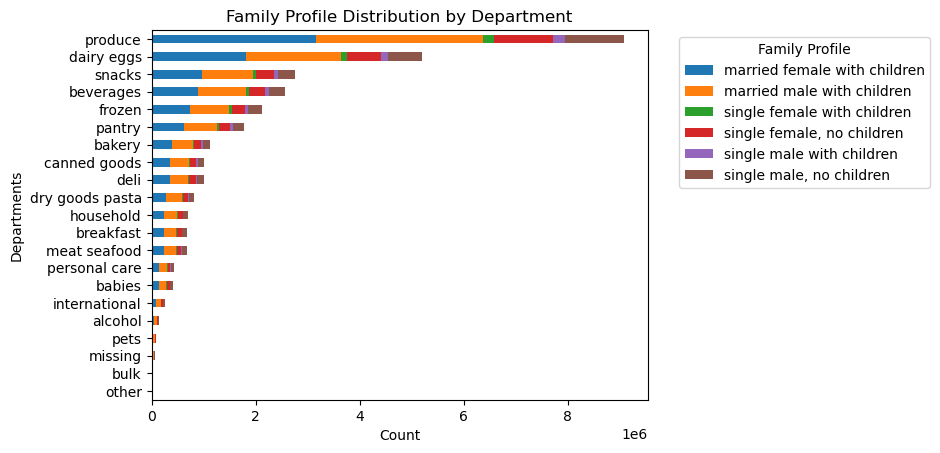

In [77]:
# Create fam_departments_profile_bar chart
fam_departments_profile_bar = fam_departments_profile.sort_values(by='married female with children', ascending=True)

plt.figure(figsize=(10, 12))  
fam_departments_profile_bar.plot.barh(stacked=True)

# Titles and labels
plt.title('Family Profile Distribution by Department')
plt.xlabel('Count')
plt.ylabel('Departments')
plt.legend(title='Family Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
plt.show()


In [78]:
# Export stacked bar chart to visualizations folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_departments_profile_bar.png'))

<Figure size 640x480 with 0 Axes>

#### Income distribution statistics

In [79]:
# Aggregate income_group and order_id columns
income_group_distribution_agg = df_final.groupby('income_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [80]:
# Check
income_group_distribution_agg

order_id prices                    
                  count    min       mean      max
income_group                                      
High Income     7748000    1.0  21.972839  99999.0
Low Income      7748855    1.0   7.315159  14900.0
Middle Income  15495543    1.0   9.225214  99999.0

Text(0, 0.5, 'Count')

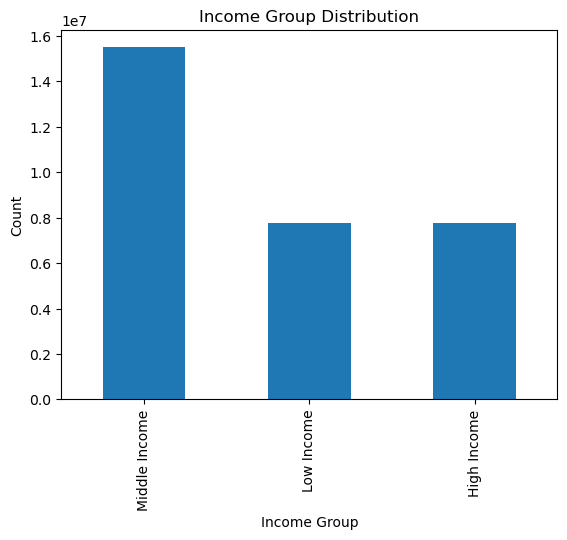

In [81]:
# Create income_group_distribution chart
income_group_distribution = df_final['income_group'].value_counts().plot.bar()

# Titles and labels
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')

In [82]:
# Export the bar chart to visualizations folder
income_group_distribution.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_distribution.png'))

#### Distribution of income group by region

In [83]:
# Create crosstab of income_group and region
income_group_region = pd.crosstab(df_final['income_group'],df_final['region'], dropna = False)

In [84]:
# Check
income_group_region

region,Midwest,Northeast,South,West
income_group,,,,
High Income,1843425,1374284,2551358,1978933
Low Income,1792303,1368421,2596210,1991921
Middle Income,3631713,2727363,5172894,3963573


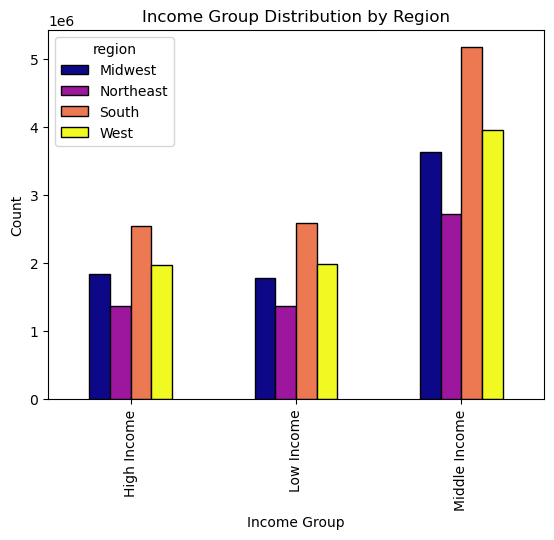

In [85]:
# Create income_group_region_bar chart
income_group_region_bar = income_group_region.plot(kind = 'bar', colormap = 'plasma', edgecolor = 'black')

# Titles and labels
plt.title('Income Group Distribution by Region')
plt.xlabel('Income Group')
plt.ylabel('Count')

plt.show()

In [86]:
# Export income_group_region_bar chart
income_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_region_bar.png'))

#### Distribution of income group by departments

In [87]:
# Create crosstab of department and income_group columns
income_group_department = pd.crosstab(df_final['department'],df_final['income_group'], dropna = False) 

In [88]:
# Check
income_group_department

income_group,High Income,Low Income,Middle Income
department,,,
alcohol,40885,36828,66961
babies,105674,83835,220883
bakery,291191,266848,566976
beverages,618540,743211,1210149
breakfast,164607,189503,323979
bulk,7541,9400,16510
canned goods,265864,222477,523720
dairy eggs,1317725,1232305,2641760
deli,251018,248154,504659


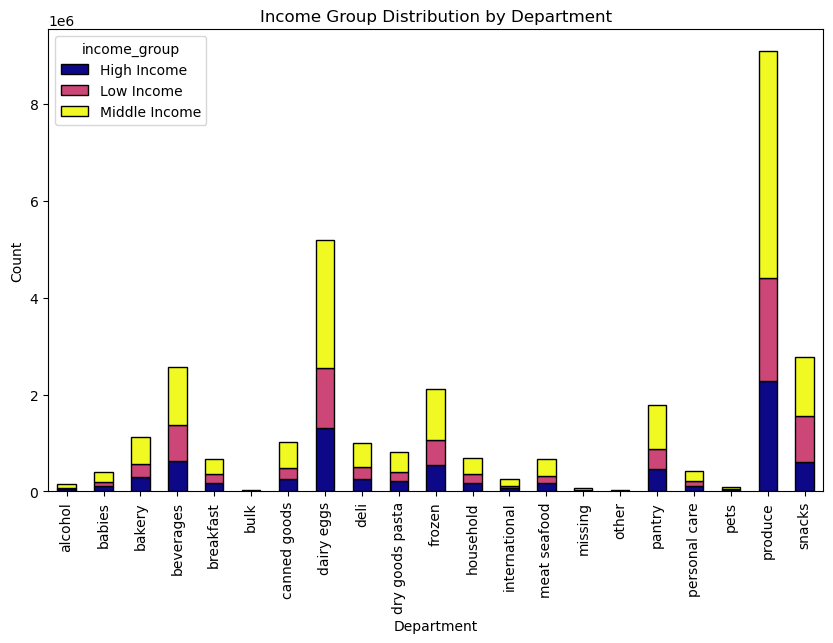

In [89]:
# Create income_group_department_bar chart
income_group_department_bar = income_group_department.plot(kind = 'bar', stacked = True, colormap = 'plasma', edgecolor = 'black', figsize=(10, 6))

# Titles and labels
plt.title('Income Group Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

In [90]:
# Export income_group_department_bar to visualizations folder
income_group_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_department_bar.png'))

### Age groups distribution

In [91]:
# Aggregate age_group and order_id columns
age_group_agg = df_final.groupby('age_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [92]:
# Check
age_group_agg

order_id prices                    
                    count    min       mean      max
age_group                                           
18-29 years old   5823021    1.0  12.199361  99999.0
30-49 years old   9739204    1.0  12.079181  99999.0
50-59 years old   4846498    1.0  11.781495  99999.0
60-81 years old  10583941    1.0  11.725665  99999.0

Text(0, 0.5, 'Count')

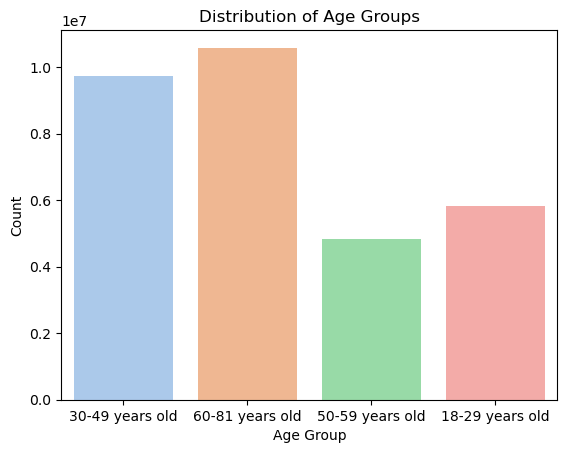

In [93]:
# Define colors
colors = sns.color_palette("pastel", len(df_final['age_group'].unique()))

# Create age_group_distribution_bar chart
age_group_distribution_bar = sns.countplot(x ='age_group', data = df_final, palette=colors)

# Titles and labels
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

In [94]:
# Export age_group_distribution_bar chart to visualizations folder
age_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_distribution_bar.png'))

#### Distribution of age groups by region

In [95]:
# Create a crosstab of region and age_group
age_group_region = pd.crosstab(df_final['region'], df_final['age_group'], dropna = False)

In [96]:
# Check
age_group_region

age_group,18-29 years old,30-49 years old,50-59 years old,60-81 years old
region,,,,
Midwest,1356946,2304202,1149210,2457349
Northeast,1025132,1708764,850120,1886052
South,1962570,3251284,1582024,3524584
West,1478373,2474954,1265144,2715956


Text(0, 0.5, 'Count')

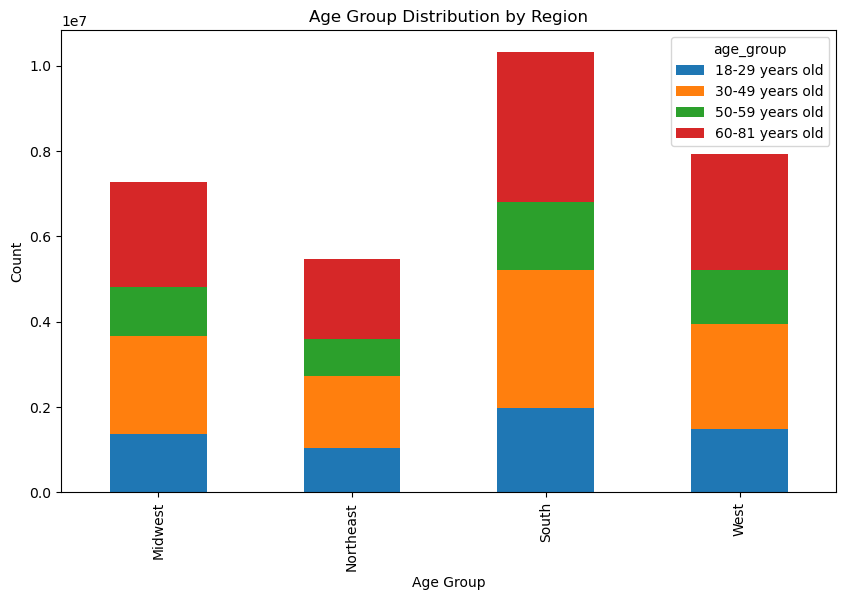

In [97]:
# Create age_group_region_bar chart
age_group_region_bar = age_group_region.plot(kind ='bar', stacked = True, figsize = (10, 6))

# Titles and labels
plt.title('Age Group Distribution by Region')
plt.xlabel('Age Group')
plt.ylabel('Count')

In [98]:
# Export age_group_region_bar chart to visualizations folder
age_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_region_bar.png'))

#### Distribution of age groups by departments

In [99]:
# Create a crosstab of department and age_group
age_group_department = pd.crosstab(df_final['department'], df_final['age_group'], dropna = False)

In [100]:
# Check
age_group_department

age_group,18-29 years old,30-49 years old,50-59 years old,60-81 years old
department,,,,
alcohol,27942,46162,22940,47630
babies,77758,130770,63126,138738
bakery,211198,353552,176625,383651
beverages,477658,803198,407398,883680
breakfast,129590,212261,106039,230205
bulk,6414,10594,5019,11424
canned goods,192170,316357,159100,344447
dairy eggs,978948,1641477,803744,1767659
deli,188533,315711,156255,343335


Text(0, 0.5, 'Count')

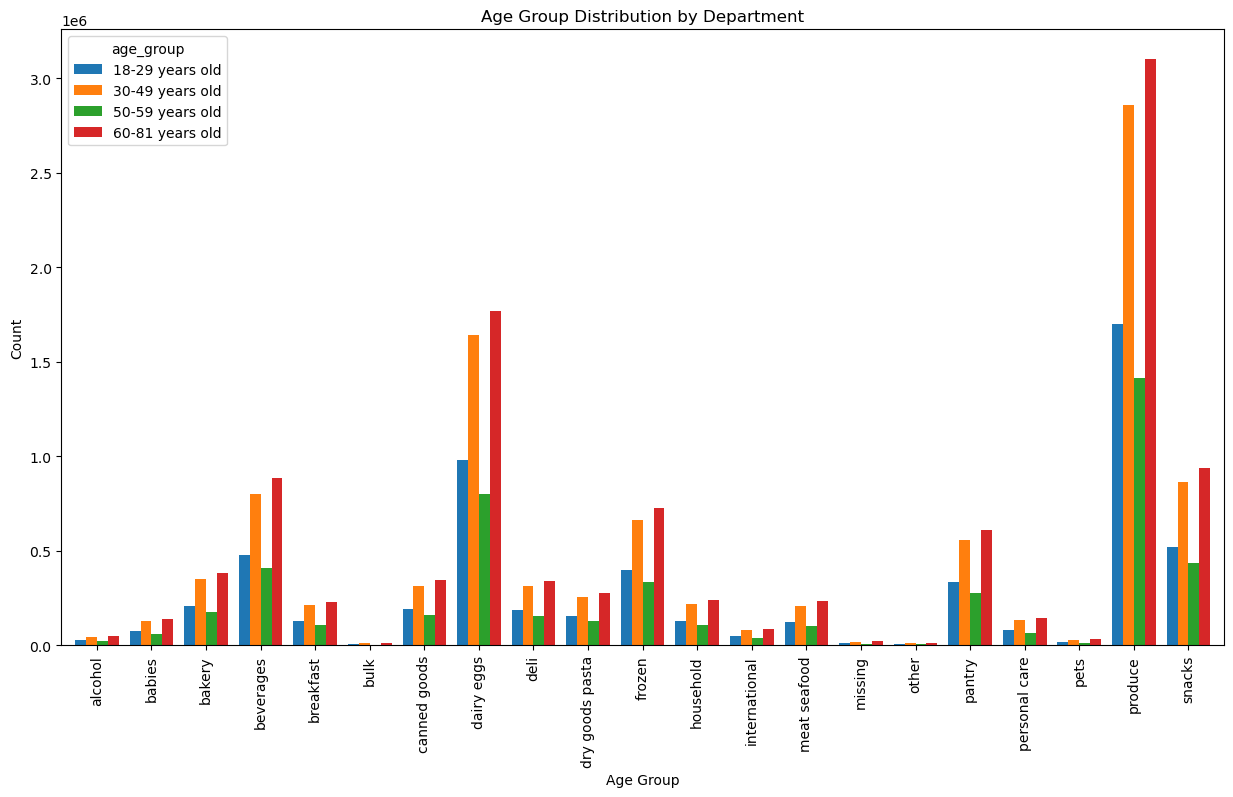

In [101]:
# Create age_group_department_bar chart
age_group_department_bar = age_group_department.plot(kind ='bar', figsize =(15, 8), width = 0.8)

# Titles and labels
plt.title('Age Group Distribution by Department')
plt.xlabel('Age Group')
plt.ylabel('Count')

In [102]:
# Export age_group_department_bar chart to visualizations folder
age_group_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_department_bar.png'))

#### Most Requested Departments

In [103]:
# Aggregate department and order_id columns
department_stats = df_final.groupby('department').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [104]:
# Check
department_stats

order_id prices                    
                   count    min       mean      max
department                                         
alcohol           144674    1.0   8.151446     15.0
babies            410392    1.0   7.634399     15.0
bakery           1125026    1.0   7.868462     15.0
beverages        2571934    1.0   7.682624     15.0
breakfast         678095    1.0   8.068044     14.9
bulk               33451    1.4   8.346919     14.1
canned goods     1012074    1.0   7.546660     15.0
dairy eggs       5191828    1.0  33.061592  99999.0
deli             1003834    1.0   7.783347     15.0
dry goods pasta   822136    1.0   7.349370     15.0
frozen           2123342    1.0   7.738627     15.0
household         699858    1.0   7.379943     15.0
international     255991    1.0   7.678797     15.0
meat seafood      674785    8.0  16.300062     25.0
missing            64768    1.0   8.660655     15.0
other              34411    1.1   6.961995     15.0
pantry           1782903    1.0   8.014940     20.0
personal care     424415    1.0   7.998617     15.0
pets               93065    1.0   7.887860     15.0
produce          9079276    1.0   7.980349     15.0
snacks           2766406    1.6   4.275555      7.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'produce'),
  Text(1, 0, 'dairy eggs'),
  Text(2, 0, 'snacks'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'frozen'),
  Text(5, 0, 'pantry'),
  Text(6, 0, 'bakery'),
  Text(7, 0, 'canned goods'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'household'),
  Text(11, 0, 'breakfast'),
  Text(12, 0, 'meat seafood'),
  Text(13, 0, 'personal care'),
  Text(14, 0, 'babies'),
  Text(15, 0, 'international'),
  Text(16, 0, 'alcohol'),
  Text(17, 0, 'pets'),
  Text(18, 0, 'missing'),
  Text(19, 0, 'other'),
  Text(20, 0, 'bulk')])

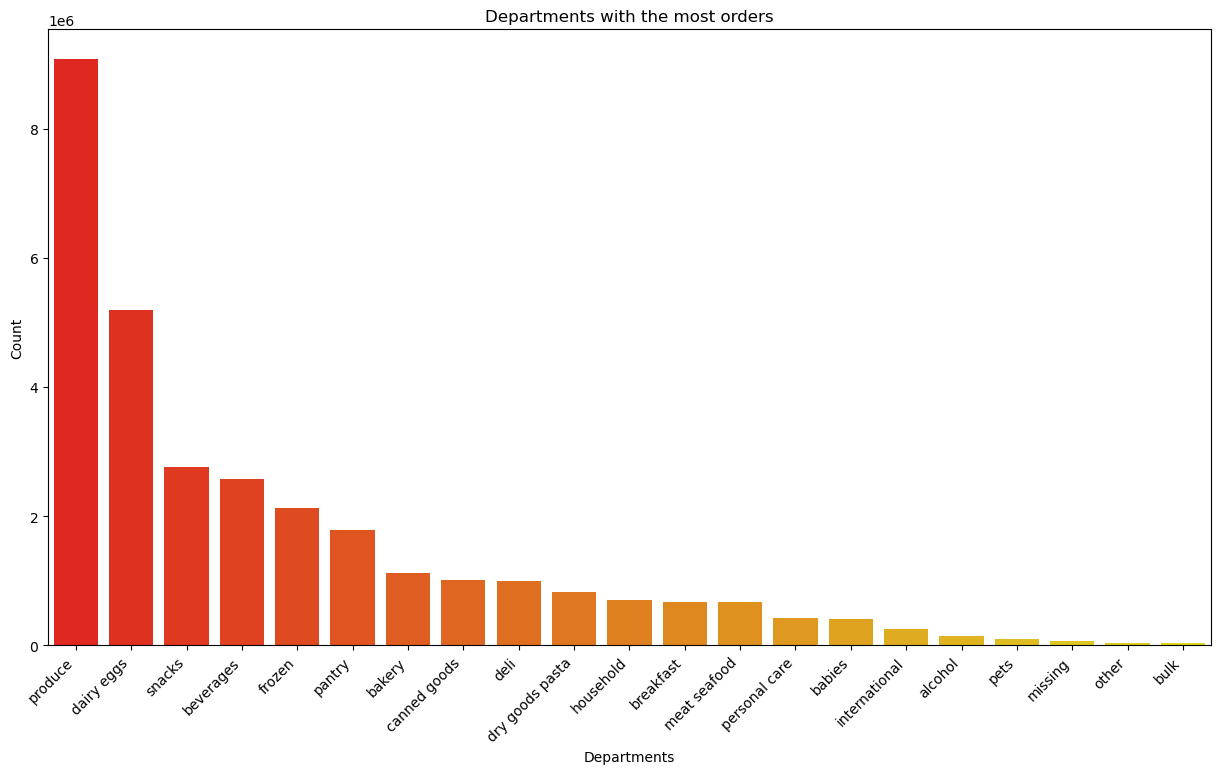

In [105]:
# Create department_counts 
department_counts = df_final['department'].value_counts()

# Create departments_distribution_bar chart
departments_distribution_bar = plt.figure(figsize = (15, 8))
sns.barplot(x = department_counts.index, y = department_counts.values, palette = 'autumn')

# Titles and labels
plt.title('Departments with the most orders')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')

In [106]:
# Export departments_distribution_bar chart
departments_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_distribution_bar.png'))

#### Distribution of departments by region

In [107]:
# Create crosstab of department and region
depatments_region = pd.crosstab(df_final['department'],df_final['region'], dropna = False)

In [108]:
# Check
depatments_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,34052,25034,48822,36766
babies,95741,72712,139511,102428
bakery,262614,200136,373055,289221
beverages,598990,462931,859435,650578
breakfast,157781,119327,225539,175448
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1215821,917293,1727823,1330891
deli,234464,178398,333620,257352


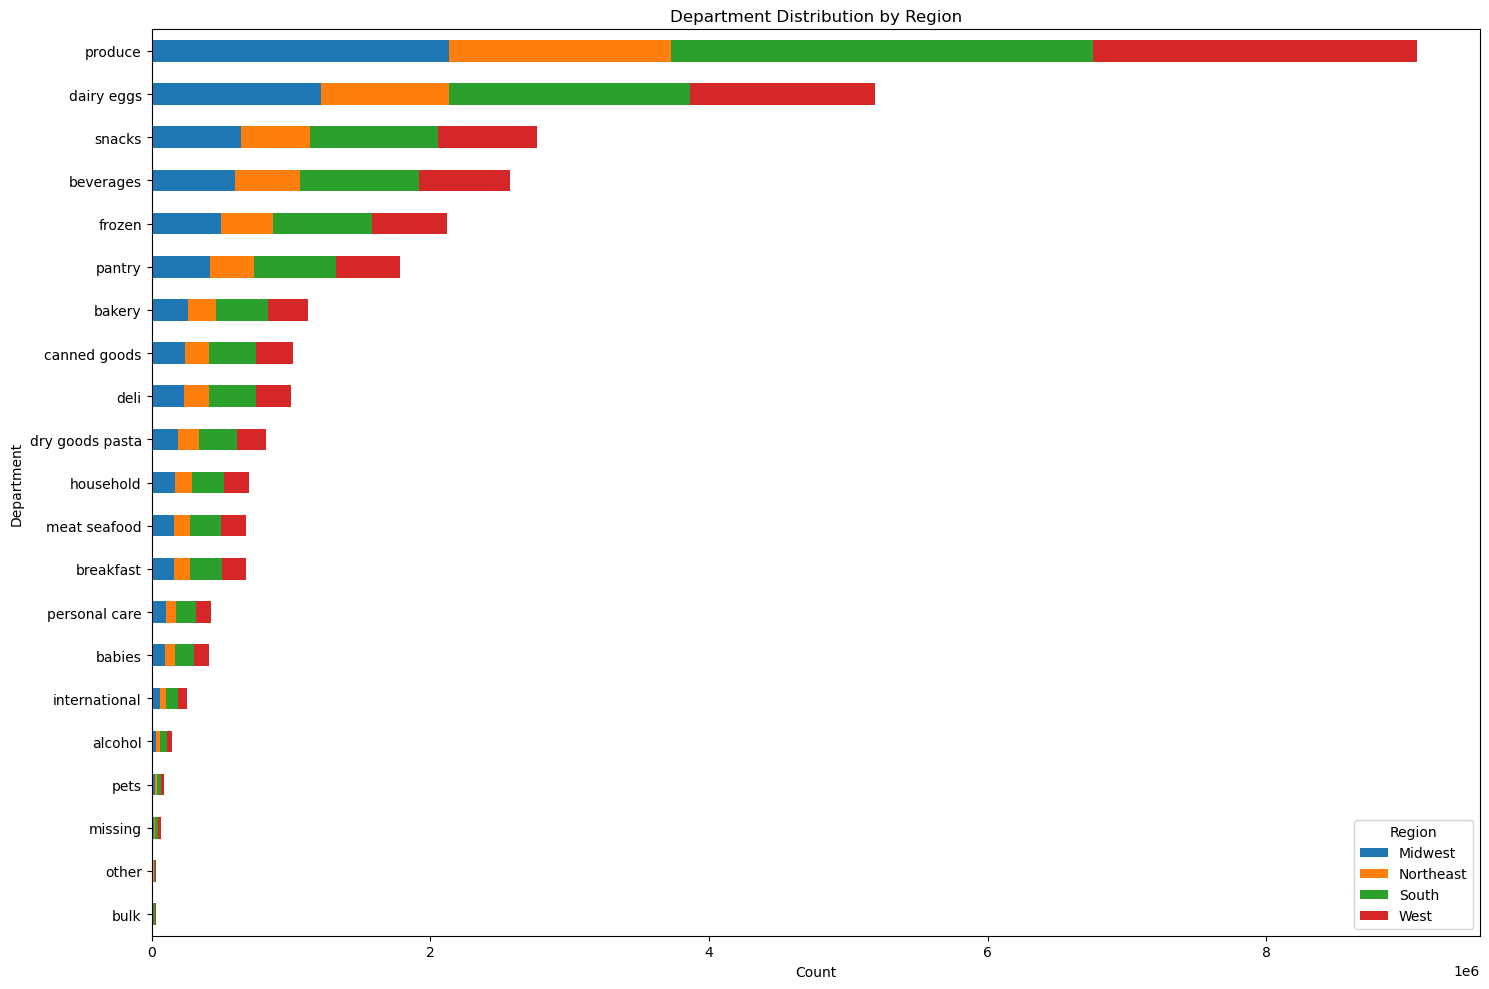

In [109]:
# Define departments_region_bar
departments_region_bar = depatments_region.sort_values(by = 'Midwest', ascending = True).plot(kind ='barh', stacked = True, figsize = (15, 10))

# Titles and labels
plt.title('Department Distribution by Region')
plt.xlabel('Count')
plt.ylabel('Department')
plt.legend(title = 'Region')
plt.tight_layout() 

In [110]:
# Export departments_region_bar chart
departments_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_region_bar.png'))

#### What are the busiest days of the week?

In [111]:
# Check dataframe columns
df_final.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_orde', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'region',
       'activity_flag', 'age_group', 'income_group', 'department',
       'dependants_group', 'family_profile'],
      dtype='object')

In [112]:
df_final['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    5913818
1    5417038
6    4294900
5    4037263
2    4028461
3    3672927
4    3628257
Name: count, dtype: int64

From the output above, 0 = Saturday, 1 = Sunday, 2 = Monday, 3 = Tuesday, 4 = Wednesday, 5 = Thursday, 6 = Friday.
I created a new column called 'week_days_orders'

In [113]:
# Create week_days_orders column
df_final['week_days_orders'] = df_final['orders_day_of_week'].map({0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'})

In [114]:
# Check
df_final['week_days_orders'].value_counts(dropna = False)

week_days_orders
Saturday     5913818
Sunday       5417038
Friday       4294900
Thursday     4037263
Monday       4028461
Tuesday      3672927
Wednesday    3628257
Name: count, dtype: int64

In [115]:
# Define busiest_week_days_bar 
busiest_week_days = df_final['week_days_orders'].value_counts(dropna = False)

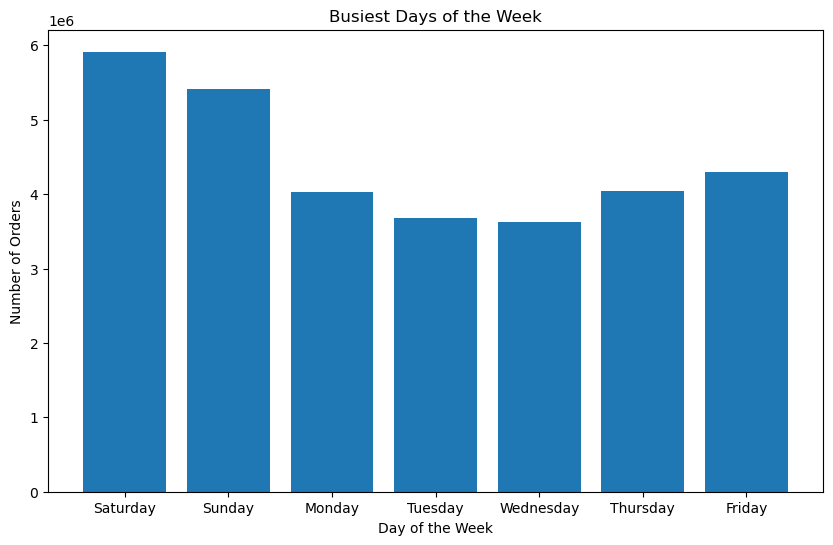

In [116]:
# Define busiest_week_days_bar 
busiest_week_days_bar = df_final['week_days_orders'].value_counts()

# Define days_of_week_order
days_of_week_order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
busiest_week_days_bar = busiest_week_days_bar.reindex(days_of_week_order)

# Titles and labels
plt.figure(figsize = (10, 6))
plt.bar(busiest_week_days_bar.index, busiest_week_days_bar.values)
plt.title('Busiest Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

plt.show()

In [117]:
# Export busiest_week_days_bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_week_days_bar.png'))

<Figure size 640x480 with 0 Axes>

#### What are the Busiest hours of the day?

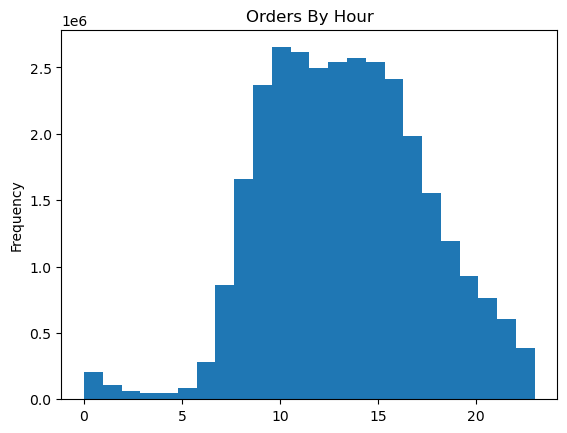

In [118]:
# Create histogram for order_hour_of_day
hist_order_hour_of_day = df_final['order_hour_of_day'].plot.hist(bins = 24, title = 'Orders By Hour')

In [119]:
# Export order_hour_of_day histogram
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day_png'))

#### Which hours during the day do customers spend more money?

In [120]:
# Create crosstab for order_hour_of_day and price_range
prices_by_hour = pd.crosstab(df_final['order_hour_of_day'],df_final['price_range_loc'], dropna = False)

In [121]:
# Check
prices_by_hour

price_range_loc,High-range product,Low-range product,Mid-range product
order_hour_of_day,,,
0,2644,64819,4806
1,1335,34033,2384
2,885,20622,1390
3,612,15029,1006
4,664,15713,1075
5,1018,26074,1878
6,3622,86902,6392
7,11274,267174,21206
8,21155,518315,41508


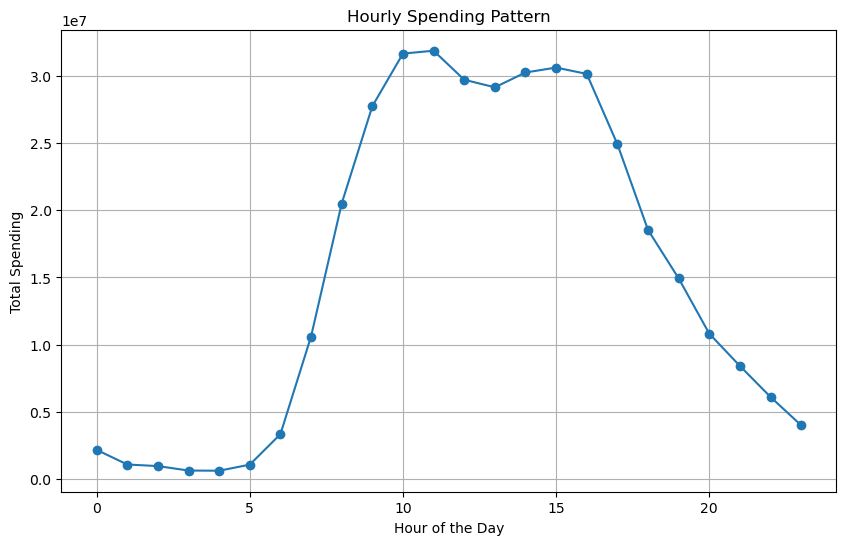

In [122]:
# Define hourly_spending line chart
hourly_spending = df_final.groupby('order_hour_of_day')['prices'].sum()

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(hourly_spending.index, hourly_spending.values, marker='o')

# Titles and labels
ax.set_title('Hourly Spending Pattern')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total Spending')
ax.grid(True)

In [123]:
# Export hourly_spending_line chart
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hourly_spending_line.png'))

#### Price Range Groupings

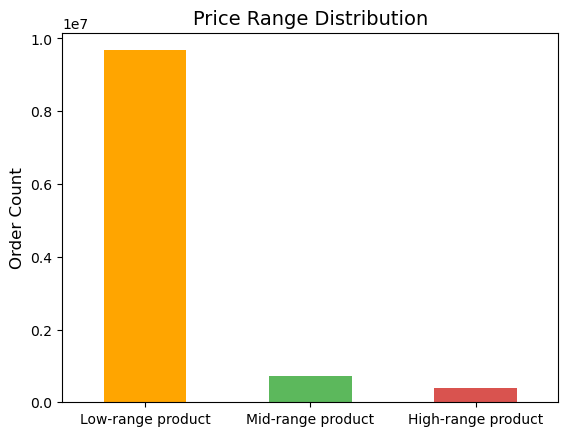

In [124]:
# Define price_range_bar
price_range_bar = df_final['price_range_loc'].value_counts()

# Define colors
price_range_bar = price_range_bar.plot(kind ='bar', color = ['#ffA500','#5cb85c', '#d9534f'])
                                       
# Titles and labels
plt.xlabel('', fontsize =12)
plt.xticks(rotation = 0)
plt.ylabel('Order Count', fontsize = 12)  
plt.title('Price Range Distribution', fontsize = 14)

plt.show()

In [125]:
# Export order_price_range bar chart
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_price_range.png'))

#### Distribution of income by price range

In [126]:
# Create a crosstab for price_range and income_group
price_range_income = pd.crosstab(df_final['price_range_loc'],df_final['income_group'], dropna = False)

In [127]:
# Check
price_range_income

income_group,High Income,Low Income,Middle Income
price_range_loc,,,
High-range product,111836,71575,214545
Low-range product,2304423,2771553,4598848
Mid-range product,175446,192019,359738


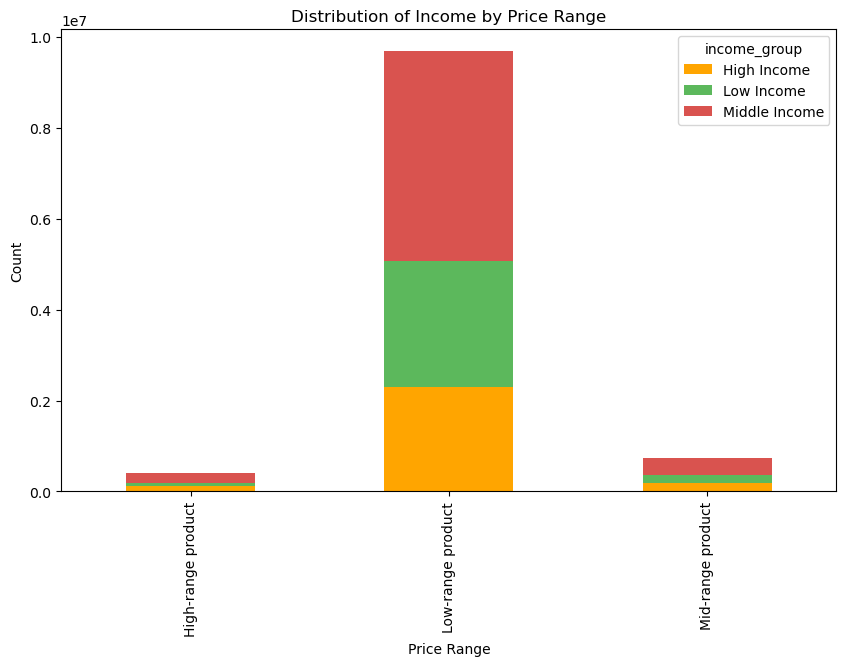

In [128]:
# Create price_range_income bar chart 
price_range_income.plot(kind = 'bar', stacked = True, figsize=(10, 6), color = ['#ffA500','#5cb85c', '#d9534f'])

# # Title and labels
plt.title('Distribution of Income by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')

plt.show()

In [129]:
# Export price_range_income_bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_income_bar.png'))

<Figure size 640x480 with 0 Axes>

#### Distribution of family profile and price range

In [130]:
# Create crosstab of price range and family profile
price_range_family_profile = pd.crosstab(df_final['price_range_loc'],df_final['family_profile'], dropna = False)

In [131]:
# Check 
price_range_family_profile

family_profile,married female with children,married male with children,single female with children,"single female, no children",single male with children,"single male, no children"
price_range_loc,,,,,,
High-range product,139401,142103,9118,48021,9879,49435
Low-range product,3375071,3418765,226195,1205702,235612,1213555
Mid-range product,254732,256197,17199,90586,17410,91080


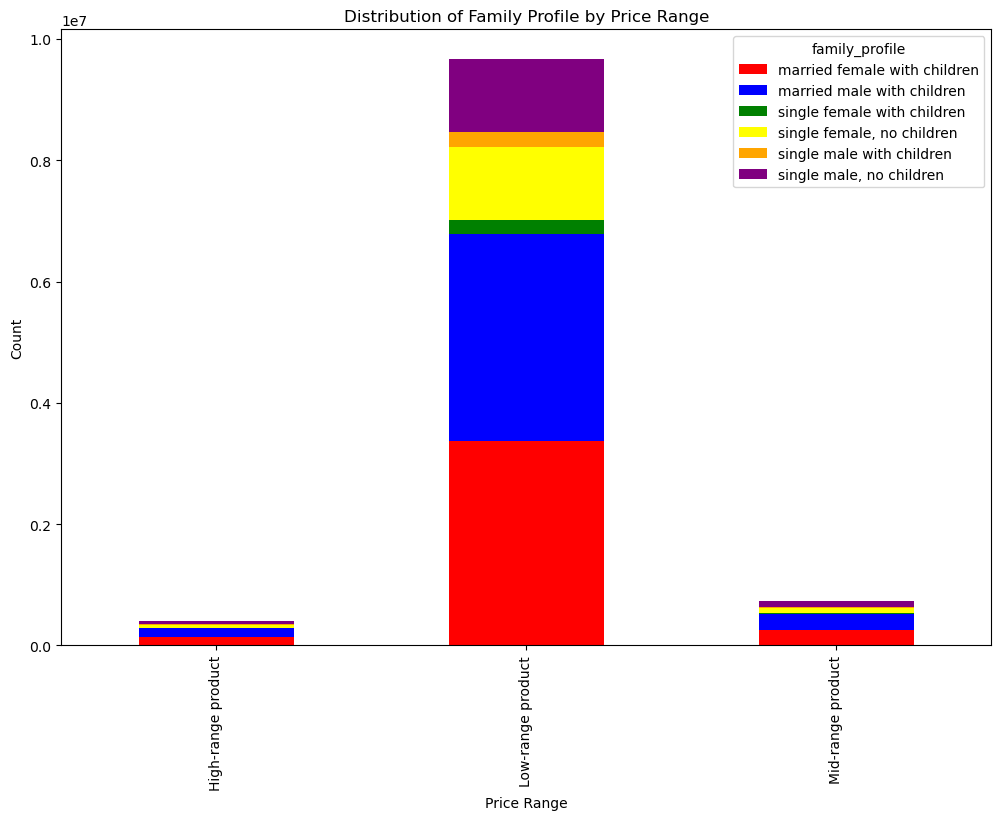

In [132]:
# Define price_range_family_profile
price_range_family_profile = price_range_family_profile[['married female with children', 'married male with children', 'single female with children', 'single female, no children', 'single male with children', 'single male, no children']]

# Define colors
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple']

# Create a bar chart with custom colors
price_range_family_profile.plot(kind = 'bar', stacked = True, figsize = (12, 8), color=colors)

# Title and labels
plt.title('Distribution of Family Profile by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')

plt.show()

In [133]:
# Export price_range_family_profile_bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_family_profile_bar.png'))

<Figure size 640x480 with 0 Axes>

#### Departments Frequency

Text(0.5, 1.0, 'Orders by Department')

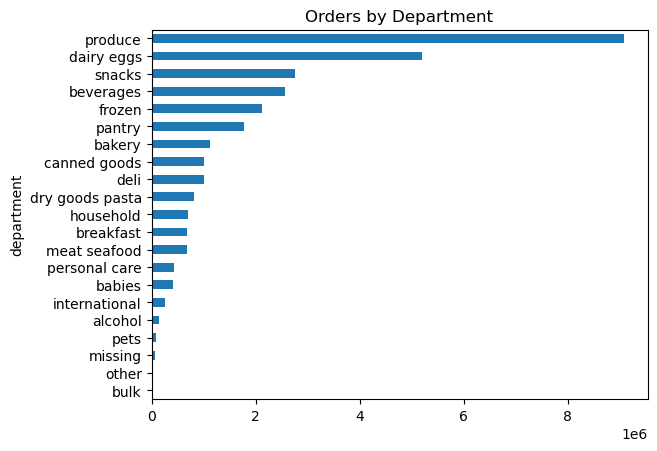

In [134]:
# Create bar chart for orders by department
department_frequency = df_final['department'].value_counts().sort_values(ascending = True).plot.barh()
plt.title("Orders by Department")

In [135]:
# Export department_frequency_bar chart
department_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_frequency_bar.png'))

#### Brand Loyalty

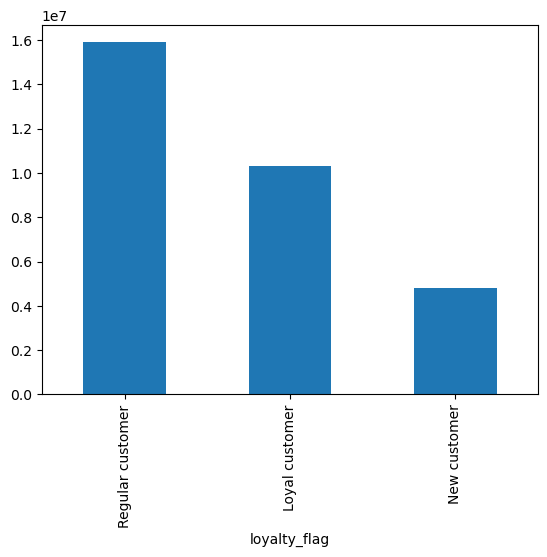

In [136]:
# Create bar chart for loyalty flag
loyalty_bar = df_final['loyalty_flag'].value_counts().plot.bar()

In [137]:
# Export brand_loyalty_bar chart
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'brand_loyalty_bar.png'))

#### Are ordering habits based on customer’s loyalty status?

In [138]:
# Create a crosstab of department and loyalty flag
loyalty_flag_departments = pd.crosstab(df_final['department'],df_final['loyalty_flag'], dropna = False)

In [139]:
# Check columns
loyalty_flag_departments

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38726,28647,77301
babies,167108,46708,196576
bakery,381686,172636,570704
beverages,855024,396658,1320252
breakfast,223866,107357,346872
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1835676,752101,2604051
deli,324046,158335,521453


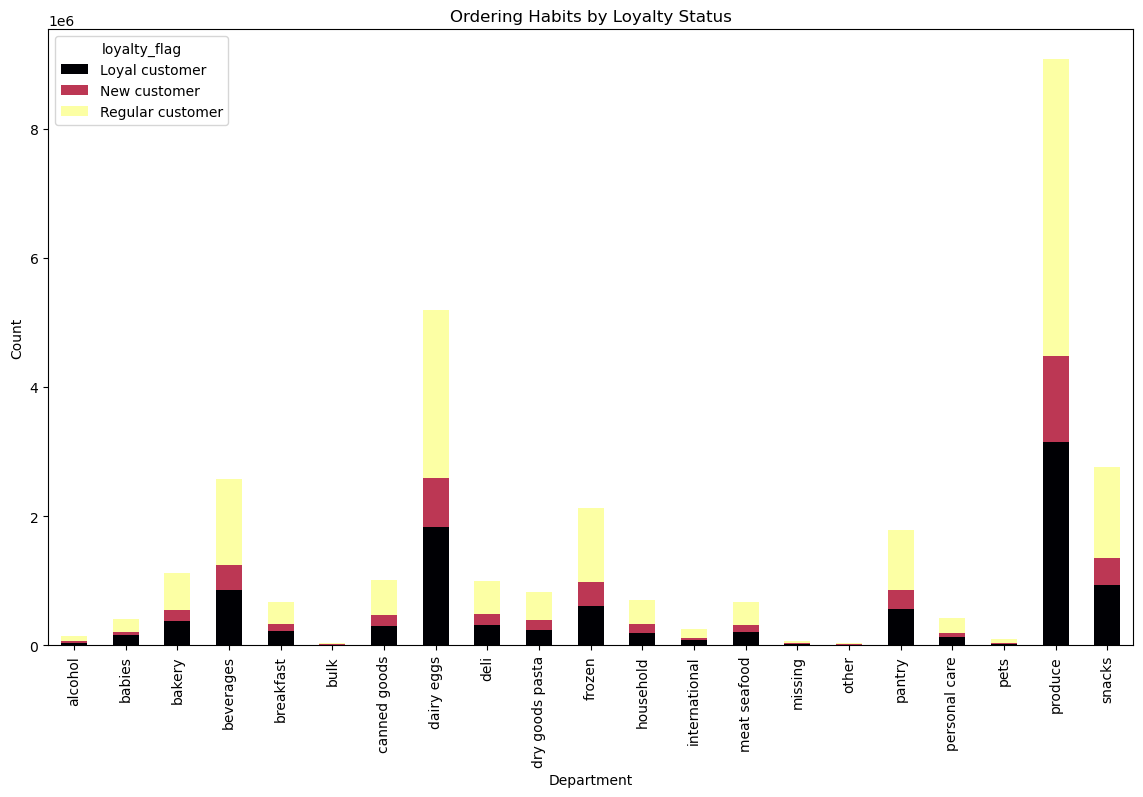

In [140]:
# Create a crosstab of department and loyalty flag
loyalty_flag_departments = pd.crosstab(df_final['department'], df_final['loyalty_flag'], dropna=False)

# Reorder columns to aide visualization
loyalty_flag_departments = loyalty_flag_departments[['Loyal customer', 'New customer', 'Regular customer']]

# Create a stacked bar chart
loyalty_flag_departments.plot(kind = 'bar', stacked = True, figsize = (14, 8), colormap = 'inferno')

# Title and labels
plt.title('Ordering Habits by Loyalty Status')
plt.xlabel('Department')
plt.ylabel('Count')

plt.show()

In [141]:
# Export loyalty_flag_departments bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_departments_bar.png'))

<Figure size 640x480 with 0 Axes>

#### Ordering Habits Based On a Customer’s Region

In [142]:
# Create a crosstab of region and loyalty_flag
loyalty_flag_region = pd.crosstab(df_final['region'],df_final['loyalty_flag'], dropna = False)

In [143]:
# Check columns
loyalty_flag_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2375969,1137734,3754004
Northeast,1843750,842941,2783377
South,3408818,1595046,5316598
West,2665200,1232129,4037098


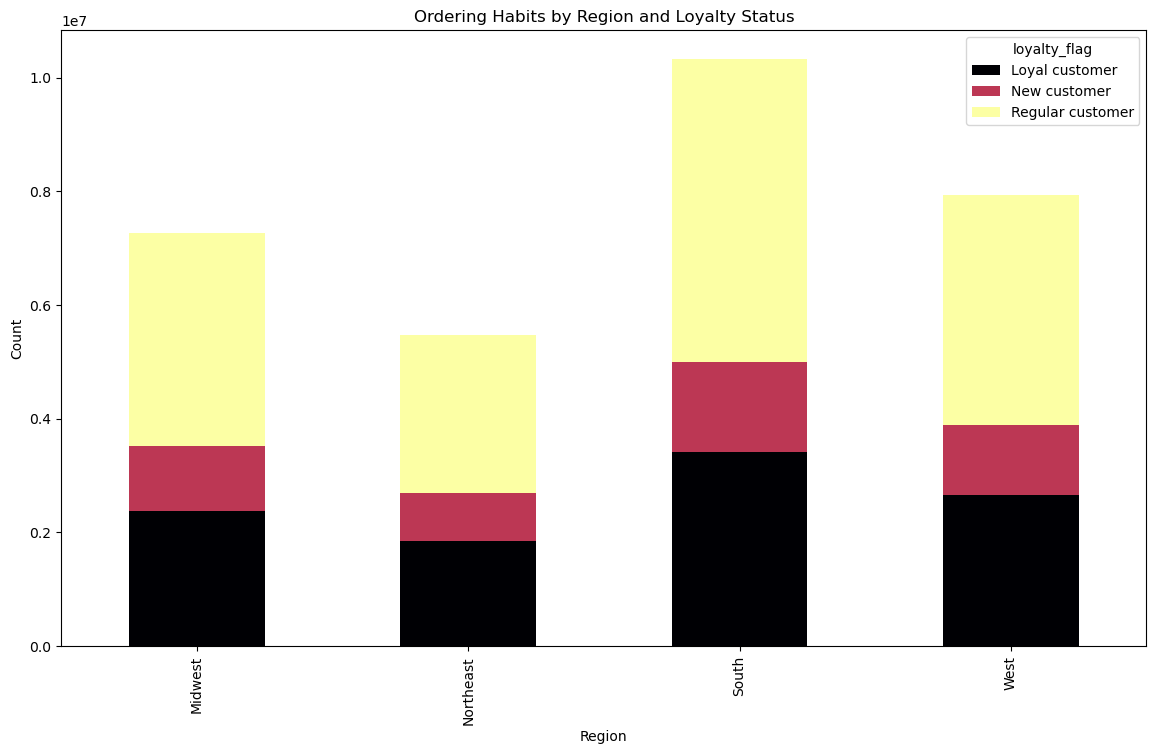

In [144]:
# Create a crosstab of region and loyalty_flag
loyalty_flag_region = pd.crosstab(df_final['region'], df_final['loyalty_flag'], dropna = False)

# Reorder columns to aide visualization
loyalty_flag_region = loyalty_flag_region[['Loyal customer', 'New customer', 'Regular customer']]

# Create a stacked bar chart
loyalty_flag_region.plot(kind = 'bar', stacked = True, figsize = (14, 8), colormap = 'inferno')

# Title and labels
plt.title('Ordering Habits by Region and Loyalty Status')
plt.xlabel('Region')
plt.ylabel('Count')

plt.show()

In [145]:
# Export loyalty_flag_region bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_region_bar.png'))

<Figure size 640x480 with 0 Axes>

#### Is there a connection between age and family status in terms of ordering habits?

In [146]:
# create crosstab of age groupand family profile
age_family_profile = pd.crosstab(df_final['age_group'],df_final['family_profile'], dropna = False)

In [147]:
# Check columns
age_family_profile

family_profile,married female with children,married male with children,single female with children,"single female, no children",single male with children,"single male, no children"
age_group,,,,,,
18-29 years old,1402217,1489133,724262,707464,758349,741596
30-49 years old,3643791,3666733,0,1209876,0,1218804
50-59 years old,1824626,1800341,0,606170,0,615361
60-81 years old,3934958,4001222,0,1338622,0,1309139


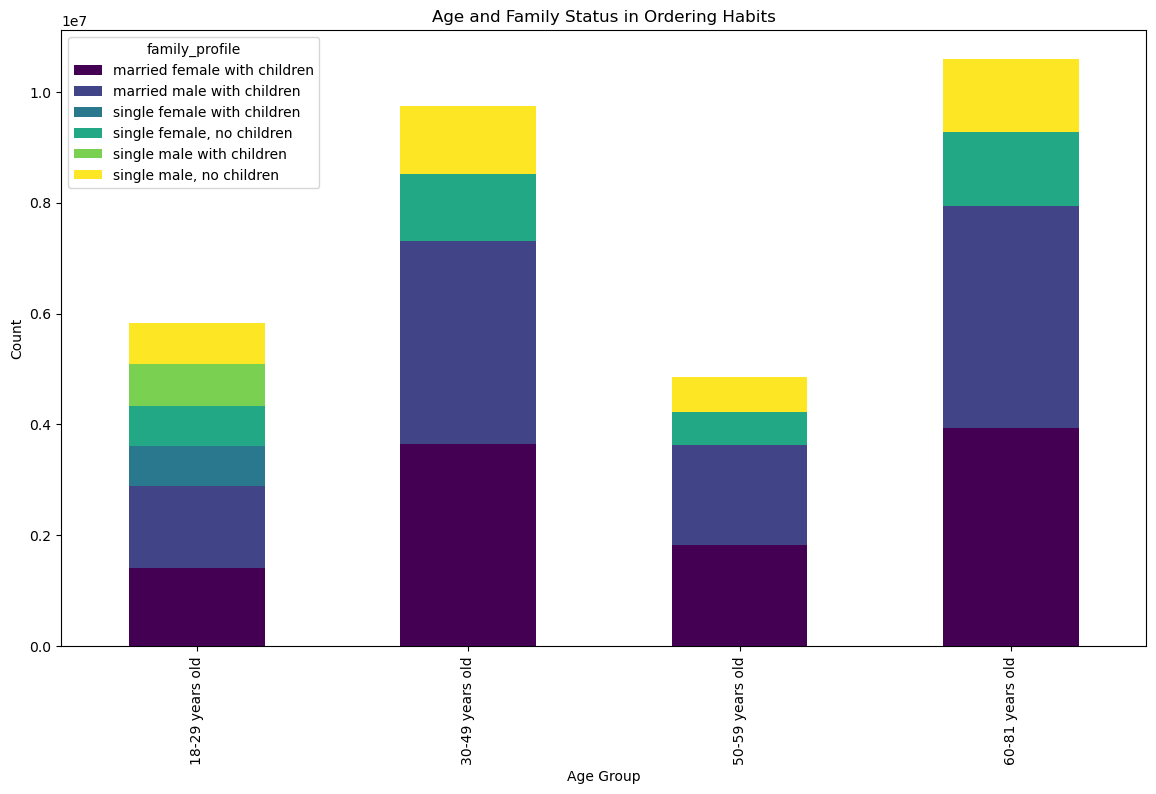

In [148]:
# Create a crosstab of age_group and family_profile
age_family_crosstab = pd.crosstab(df_final['age_group'], df_final['family_profile'], dropna = False)

# Reorder columns to aide visualization
age_family_crosstab = age_family_crosstab[['married female with children', 'married male with children', 'single female with children', 'single female, no children', 'single male with children', 'single male, no children']]

# Create a stacked bar chart
age_family_crosstab.plot(kind = 'bar', stacked = True, figsize = (14, 8), colormap = 'viridis')

# Title and labels
plt.title('Age and Family Status in Ordering Habits')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.show()

In [149]:
# Export age_family_status bar chart 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_family_status_bar.png'))

<Figure size 640x480 with 0 Axes>

#### Is a connection between age and income earned?

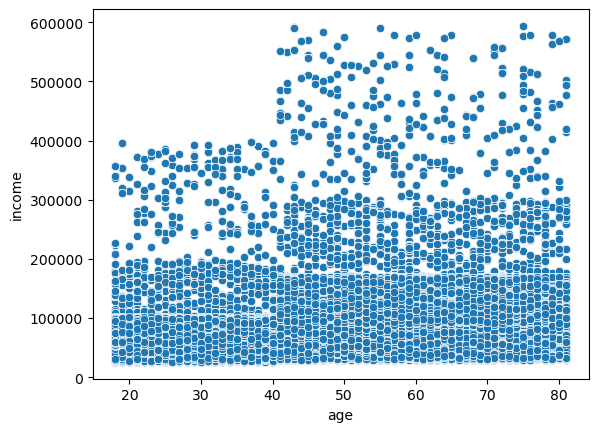

In [150]:
# Create a scatterplot of age and income
age_income_scatterplot = sns.scatterplot(x = 'age', y = 'income',data = df_final)

The scatterplot shows that even though the majority seem to earn within 200,000, there is a jump in the income of individuals aged above 40. There are more people aged 40+ that earn above 200,000 with some individuals able to earn an income above 400,000. No one below 40 managed to earn above 400,000. As such we can determine that there is a slightly positive correlation between age and income.

In [151]:
# Export scatterplot
age_income_scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_scatterplot.png'))

#### Marital status of customers

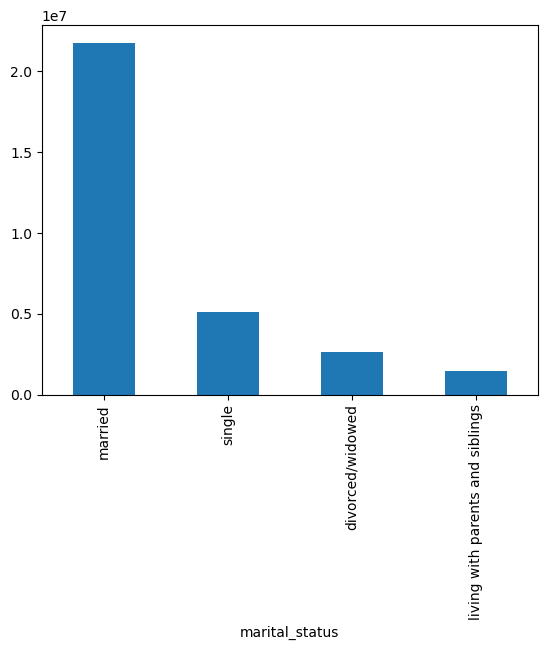

In [152]:
# Create marital status bar chart
marital_status_bar = df_final['marital_status'].value_counts().plot.bar()

In [153]:
# Export marital_status bar chart to visualizations folder
marital_status_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_status_bar.png'))

In [154]:
# Export final dataset
df_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_visuals.pkl'))